# Example of loading CSV files into a Graph

In [ ]:
%pip install networkx matplotlib scipy

In [11]:
import pandas as pd
import networkx as nx

# Initialize the graph
G = nx.Graph()

# -------------------------
# Load Author Nodes
# -------------------------
# CSV format: author_id, name
authors_df = pd.read_csv("GraphDataset/author.csv", header=None, names=["node_id", "name"])
for _, row in authors_df.iterrows():
    G.add_node(row["node_id"], type="author", name=row["name"])

# -------------------------
# Load Category Nodes
# -------------------------
# CSV format: category_id, name (e.g., "cs.LG")
categories_df = pd.read_csv("GraphDataset/category.csv", header=None, names=["node_id", "name"])
for _, row in categories_df.iterrows():
    G.add_node(row["node_id"], type="category", name=row["name"])

# -------------------------
# Load Paper Nodes
# -------------------------
# CSV format: paper_id, identifier, date, title
papers_df = pd.read_csv("GraphDataset/paper.csv", header=None, names=["node_id", "paper_id", "publish_date", "title"])
for _, row in papers_df.iterrows():
    G.add_node(row["node_id"], type="paper", paper_id=row["paper_id"], date=row["publish_date"], title=row["title"])

# -------------------------
# Load Paper-Author Relationships (Edges)
# -------------------------
# CSV format: paper_id, author_id
paper_author_df = pd.read_csv("GraphDataset/paper_author.csv", header=None, names=["paper_id", "author_id"])
for _, row in paper_author_df.iterrows():
    # Optionally check if both nodes exist
    if row["paper_id"] in G and row["author_id"] in G:
        G.add_edge(row["paper_id"], row["author_id"], relationship="written_by")
    else:
        print(f"Warning: Missing node for paper-author relationship: {row.to_dict()}")

# -------------------------
# Load Paper-Category Relationships (Edges)
# -------------------------
# CSV format: paper_id, category_id
# Note: the file is named 'paper_category.csv' per your example.
paper_category_df = pd.read_csv("GraphDataset/paper_category.csv", header=None, names=["paper_id", "category_id"])
for _, row in paper_category_df.iterrows():
    if row["paper_id"] in G and row["category_id"] in G:
        G.add_edge(row["paper_id"], row["category_id"], relationship="categorized_as")
    else:
        print(f"Warning: Missing node for paper-category relationship: {row.to_dict()}")

# -------------------------
# Summary Output
# -------------------------
print("Graph loaded successfully!")
print(f"Total Nodes: {G.number_of_nodes()}")
print(f"Total Edges: {G.number_of_edges()}")


Graph loaded successfully!
Total Nodes: 22940
Total Edges: 37272


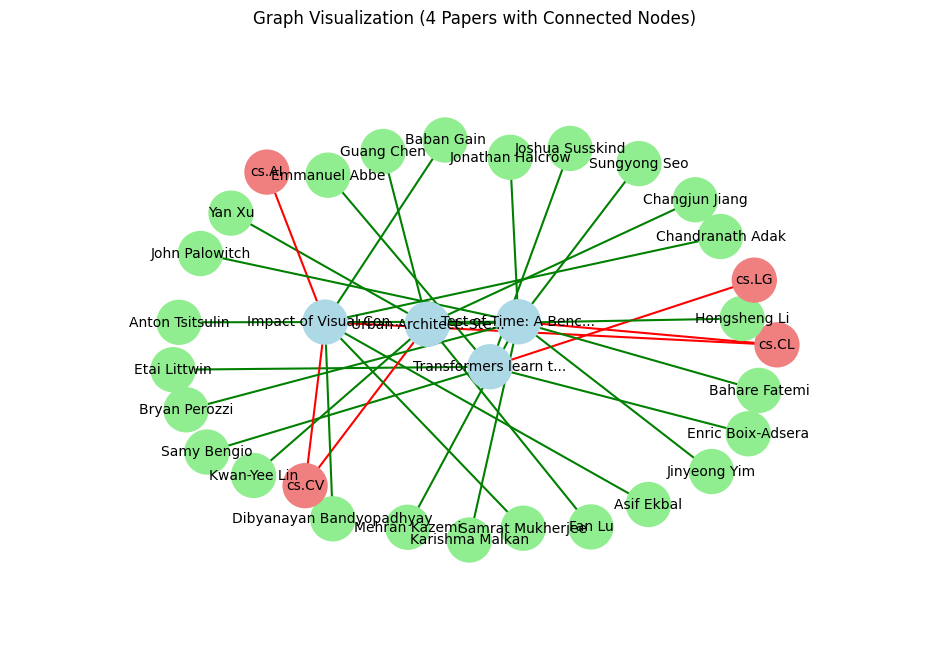

In [18]:
import matplotlib.pyplot as plt
import random

# Sample 4 paper nodes randomly
paper_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'paper']
sampled_papers = random.sample(paper_nodes, min(4, len(paper_nodes)))

# Get connected authors and categories
connected_nodes = set(sampled_papers)
for paper in sampled_papers:
    for neighbor in G.neighbors(paper):
        connected_nodes.add(neighbor)

# Create subgraph with sampled papers and their connections        
subgraph = G.subgraph(connected_nodes)

# Use a more spread out layout with increased spacing
pos = nx.spring_layout(subgraph, k=2, iterations=50)

# Draw nodes with colors based on type
node_colors = []
for node in subgraph.nodes(data=True):
    if node[1]['type'] == 'paper':
        node_colors.append('lightblue')
    elif node[1]['type'] == 'author':
        node_colors.append('lightgreen') 
    elif node[1]['type'] == 'category':
        node_colors.append('lightcoral')
    else:
        node_colors.append('grey')

# Increase figure size for better spacing
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=1000)

# Draw edges with different colors based on relationship type
edge_colors = []
for (u, v, data) in subgraph.edges(data=True):
    if data.get('relationship') == 'written_by':
        edge_colors.append('green')
    elif data.get('relationship') == 'categorized_as':
        edge_colors.append('red')
    else:
        edge_colors.append('gray')

nx.draw_networkx_edges(subgraph, pos, edge_color=edge_colors, width=1.5)

# Add labels for the nodes using names instead of IDs
labels = {}
for node, attr in subgraph.nodes(data=True):
    if attr['type'] == 'paper':
        # Use truncated paper title for cleaner visualization
        title = attr['title']
        labels[node] = title[:20] + '...' if len(title) > 20 else title
    elif attr['type'] == 'author':
        labels[node] = attr['name']
    elif attr['type'] == 'category':
        labels[node] = attr['name']
    else:
        labels[node] = node
        
nx.draw_networkx_labels(subgraph, pos, labels, font_size=10)

plt.title("Graph Visualization (4 Papers with Connected Nodes)")
plt.axis('off')

# Add more margin around the plot
plt.margins(0.2)

plt.show()
